In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Set plot styles
sns.set(style="whitegrid")
%matplotlib inline

# Step 1: Load the data

test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

# Preview the data
print(train_df.head())
print(train_df.info())
print(train_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Missing values in training set:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


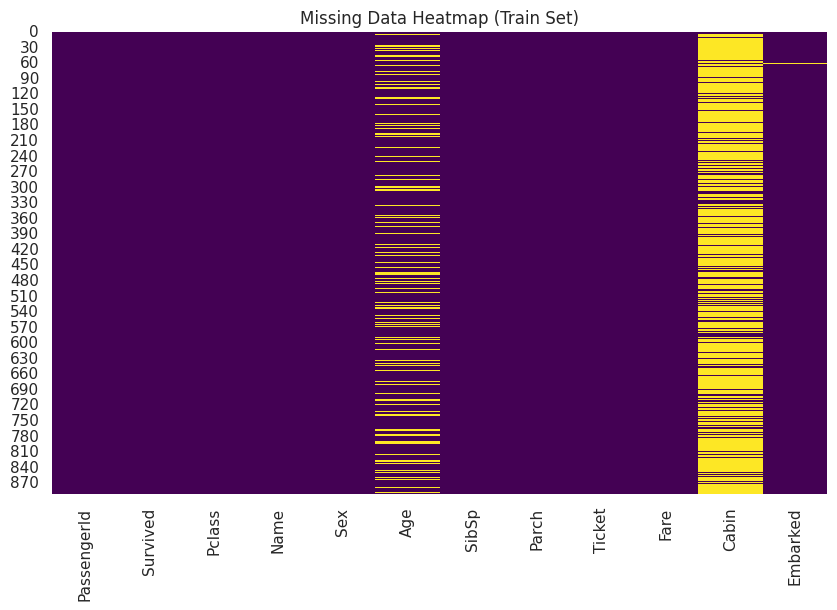

In [6]:
# Check for missing values
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values in training set:\n", missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap (Train Set)")
plt.show()


In [7]:
# Save lengths for splitting later
len_train = len(train_df)
len_test = len(test_df)

# Combine with reset index to avoid duplicates
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Extract deck
combined_df['Deck'] = combined_df['Cabin'].astype(str).str[0]
combined_df['Deck'] = combined_df['Deck'].replace('n', 'Unknown')

# OPTIONAL: If you want to inspect deck counts
print(combined_df['Deck'].value_counts())

# Label Encoding
from sklearn.preprocessing import LabelEncoder
deck_encoder = LabelEncoder()
combined_df['Deck'] = deck_encoder.fit_transform(combined_df['Deck'])

# Now split it back using row counts
train_df['Deck'] = combined_df.loc[:len_train-1, 'Deck'].values
test_df['Deck'] = combined_df.loc[len_train:, 'Deck'].values


Deck
Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: count, dtype: int64


In [8]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values in training set:\n", missing_values)

Missing values in training set:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Deck             0
dtype: int64


In [9]:
# Drop the original Cabin column (optional now that Deck is extracted)
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


In [10]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values in training set:\n", missing_values)

Missing values in training set:
 Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Deck             0
dtype: int64


In [11]:
# Save lengths for splitting later
len_train = len(train_df)
len_test = len(test_df)

# Combine both datasets to ensure consistent transformations
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [12]:
import re

# Extract Title using regex pattern (e.g., "Mr", "Mrs", "Dr")
combined_df['Title'] = combined_df['Name'].apply(lambda name: re.search(r' ([A-Za-z]+)\.', name).group(1))

# Preview extracted titles
print(combined_df['Title'].value_counts())

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64


In [13]:
# Replace rare and alternate titles
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                     'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                     'Jonkheer', 'Dona'], 'Rare')

combined_df['Title'] = combined_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Recheck distribution
print(combined_df['Title'].value_counts())

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64


In [14]:
# Loop through each title group and fill missing Age with group's median
for title in combined_df['Title'].unique():
    median_age = combined_df.loc[combined_df['Title'] == title, 'Age'].median()
    combined_df.loc[(combined_df['Age'].isnull()) & (combined_df['Title'] == title), 'Age'] = median_age


In [15]:
print("Missing Age count after imputation:", combined_df['Age'].isnull().sum())


Missing Age count after imputation: 0


In [16]:
from sklearn.preprocessing import LabelEncoder

title_encoder = LabelEncoder()
combined_df['Title'] = title_encoder.fit_transform(combined_df['Title'])

# Optional: see the mapping
print(dict(zip(title_encoder.classes_, title_encoder.transform(title_encoder.classes_))))


{'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4}


In [17]:
train_df['Title'] = combined_df.loc[:len_train-1, 'Title'].values
test_df['Title'] = combined_df.loc[len_train:, 'Title'].values

train_df['Age'] = combined_df.loc[:len_train-1, 'Age'].values
test_df['Age'] = combined_df.loc[len_train:, 'Age'].values


In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8,2


In [19]:
drop_cols = ['Name', 'Ticket', 'Cabin']  # Cabin is already dropped, but safe to include
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,male,22.0,1,0,7.2500,S,8,2
1,2,1,1,female,38.0,1,0,71.2833,C,2,3
2,3,1,3,female,26.0,0,0,7.9250,S,8,1
3,4,1,1,female,35.0,1,0,53.1000,S,2,3
4,5,0,3,male,35.0,0,0,8.0500,S,8,2


In [21]:
# Map 'male' to 0, 'female' to 1
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [22]:
embarked_encoder = LabelEncoder()
train_df['Embarked'] = embarked_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = embarked_encoder.transform(test_df['Embarked'])

In [23]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

In [24]:
print("Train columns:", train_df.columns)
print("Test columns:", test_df.columns)


Train columns: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Deck', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')
Test columns: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')


In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,7.2500,2,8,2,2,0
1,2,1,1,1,38.0,1,0,71.2833,0,2,3,2,0
2,3,1,3,1,26.0,0,0,7.9250,2,8,1,1,1
3,4,1,1,1,35.0,1,0,53.1000,2,2,3,2,0
4,5,0,3,0,35.0,0,0,8.0500,2,8,2,1,1


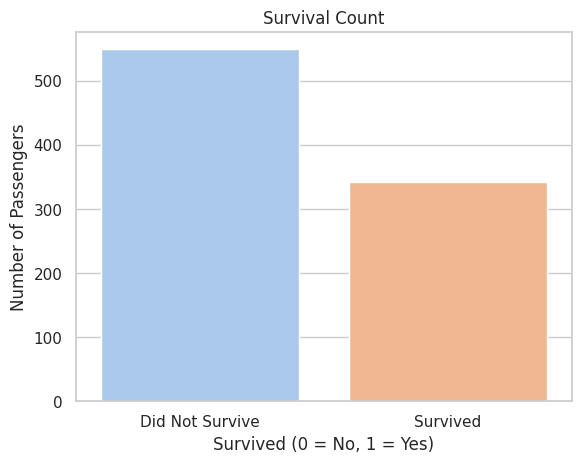

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=train_df, palette="pastel")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


In [27]:
survival_rate = train_df["Survived"].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")


Overall Survival Rate: 38.38%


In [28]:
# Quick breakdown of survival by sex
print(train_df.groupby("Sex")["Survived"].mean())
print(train_df.groupby("Pclass")["Survived"].mean())


Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


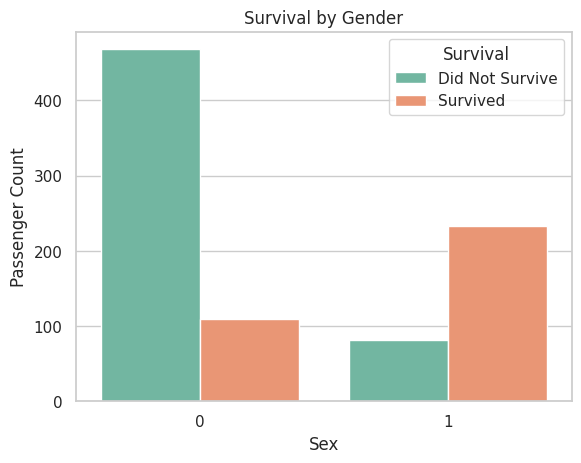

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sex", hue="Survived", data=train_df, palette="Set2")
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Passenger Count")
plt.legend(["Did Not Survive", "Survived"], title="Survival")
plt.show()


Interpretation:

Women had a much higher chance of surviving, with a survival rate of 74.20% compared to 18.89% for men.

This is a classic result of the Titanic disaster, where women and children were prioritized during lifeboat boarding.

First-class passengers had the highest survival rate (62.96%).

Second-class passengers had a decent survival rate of 47.28%.

Third-class passengers, representing the majority of passengers, had a much lower survival rate (24.24%).

This suggests that social class played a significant role in survival chances, with first-class passengers being more likely to get access to lifeboats.

“Women and children first” was the lifeboat protocol on the Titanic.

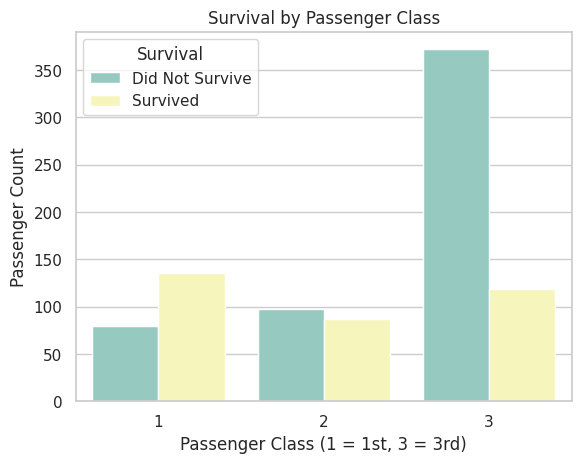

In [30]:
sns.countplot(x="Pclass", hue="Survived", data=train_df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = 1st, 3 = 3rd)")
plt.ylabel("Passenger Count")
plt.legend(["Did Not Survive", "Survived"], title="Survival")
plt.show()

In [31]:
survival_by_pclass = train_df.groupby("Pclass")["Survived"].mean()
print(survival_by_pclass)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


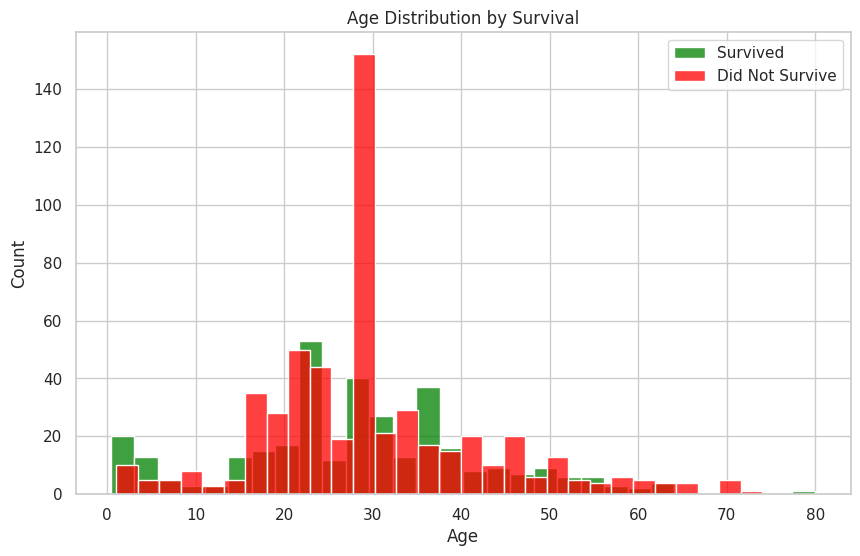

In [32]:
plt.figure(figsize=(10,6))

# Age distribution of survivors
sns.histplot(train_df[train_df["Survived"] == 1]["Age"], 
             bins=30, kde=False, color="green", label="Survived")

# Age distribution of non-survivors
sns.histplot(train_df[train_df["Survived"] == 0]["Age"], 
             bins=30, kde=False, color="red", label="Did Not Survive")

plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


In [33]:
# Age summary by survival group
print(train_df.groupby("Survived")["Age"].describe())


          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.052823  12.661941  1.00  22.0  29.0  35.0  74.0
1         342.0  28.092602  14.045984  0.42  21.0  28.0  35.0  80.0


AgeBin
(0, 10]     0.588235
(10, 20]    0.382609
(20, 30]    0.311688
(30, 40]    0.482558
(40, 50]    0.379310
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


<ipython-input-34-ac540190760b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_survival = train_df.groupby('AgeBin')['Survived'].mean()


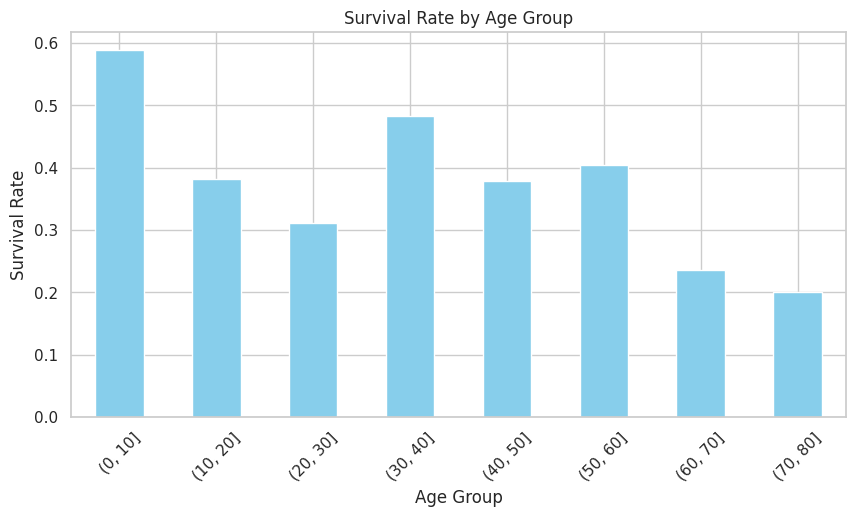

In [34]:
# Bin ages
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Survival rate by age group
age_bin_survival = train_df.groupby('AgeBin')['Survived'].mean()
print(age_bin_survival)

# Bar plot
age_bin_survival.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


In [35]:
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamilySize,IsAlone,AgeBin
0,1,0,3,0,22.0,1,0,7.2500,2,8,2,2,0,"(20, 30]"
1,2,1,1,1,38.0,1,0,71.2833,0,2,3,2,0,"(30, 40]"
2,3,1,3,1,26.0,0,0,7.9250,2,8,1,1,1,"(20, 30]"
3,4,1,1,1,35.0,1,0,53.1000,2,2,3,2,0,"(30, 40]"
4,5,0,3,0,35.0,0,0,8.0500,2,8,2,1,1,"(30, 40]"


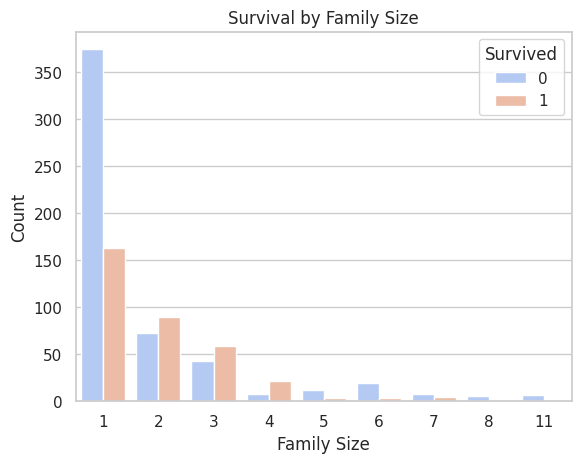

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [36]:
# Plot survival by family size
sns.countplot(x="FamilySize", hue="Survived", data=train_df, palette="coolwarm")
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

# Optional: print survival rate by family size
print(train_df.groupby("FamilySize")["Survived"].mean())

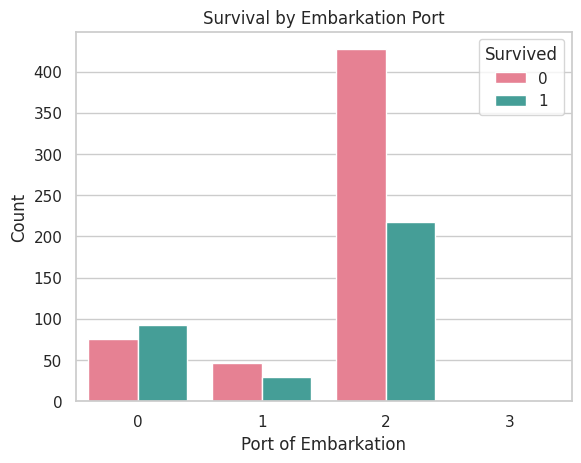

Embarked
0    0.553571
1    0.389610
2    0.336957
3    1.000000
Name: Survived, dtype: float64


In [37]:
sns.countplot(x="Embarked", hue="Survived", data=train_df, palette="husl")
plt.title("Survival by Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

print(train_df.groupby("Embarked")["Survived"].mean())


In [42]:
train_df.drop(columns=['AgeBin'], inplace=True, errors='ignore')
test_df.drop(columns=['AgeBin'], inplace=True, errors='ignore')





In [51]:
# ✅ Import XGBoost and supporting modules
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [52]:
# ✅ Prepare features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
            'Deck', 'Title', 'FamilySize', 'IsAlone']
X = train_df[features]
y = train_df['Survived']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# ✅ Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Full dataset (no split since GridSearch uses CV)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
            'Deck', 'Title', 'FamilySize', 'IsAlone']

X = train_df[features]
y = train_df['Survived']

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb,
                                param_grid=param_grid,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=2)

grid_search_xgb.fit(X, y)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.8496202372732409


In [55]:
best_xgb = grid_search_xgb.best_estimator_

# Handle any missing values
test_df[features] = test_df[features].fillna(test_df[features].median(numeric_only=True))

xgb_preds = best_xgb.predict(test_df[features])

In [57]:
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

Best Cross-Validation Score: 0.8496202372732409


In [58]:
best_xgb = grid_search_xgb.best_estimator_

# Fill any remaining missing values (just to be safe)
test_df[features] = test_df[features].fillna(test_df[features].median(numeric_only=True))

# Predict
xgb_preds = best_xgb.predict(test_df[features])

# Save submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': xgb_preds
})
submission.to_csv('submission_xgboost_tuned.csv', index=False)
print("✅ Submission saved as submission_xgboost_tuned.csv")


✅ Submission saved as submission_xgboost_tuned.csv
